In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from glob import glob
from IPython.display import display
import matplotlib.pyplot as plt
plt.style.use('bmh') # for better plots

In [2]:
# scrap all raw dataset in the folder
Raw_data_paths = sorted(glob("Data/HAPT-Dataset/Raw-Data/*"))
Raw_data_paths

['Data/HAPT-Dataset/Raw-Data/acc_exp01_user01.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp02_user01.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp03_user02.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp04_user02.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp05_user03.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp06_user03.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp07_user04.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp08_user04.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp09_user05.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp10_user05.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp11_user06.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp12_user06.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp13_user07.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp14_user07.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp15_user08.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp16_user08.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp17_user09.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp18_user09.txt',
 'Data/HAPT-Dataset/Raw-Data/acc_exp19_user10.txt',
 'Data/HAPT-

### Comment:
As we can see, there are 61 raw accelerometer datasets, 61 raw gyroscope datasets, and 1 label file.

In [3]:
# define that only the first 61 datasets are accelerometer data
Raw_acc_paths = Raw_data_paths[0:61]

# define that only the next 61 datasets are gyroscope data
Raw_gyro_paths = Raw_data_paths[61:122]

In [4]:
# This function imports values raw accelerometer and gyroscope files, convert their string values into float
# followed by transforming the dataset into a pandas dataframe with defined columns

def import_raw_data(file_path, columns):

    file = open(file_path,'r')
    temp_list = [] # create a temporary list to store content
    
    for line in file:
        temp_list.append([float(value) for value in line.split()])

    data = np.array(temp_list) # convert temp_list into a numpy array

    df = pd.DataFrame(data = data, columns = columns)

    return df

In [80]:
raw_dict = {} # dictionary containing all raw acc and gyro data


# define columns for accelerometer data
raw_acc_columns = ['acc_X','acc_Y','acc_Z']

# define columns for gyroscope data
raw_gyro_columns = ['gyro_X','gyro_Y','gyro_Z']

# loop for to convert  each "acc file" into data frame of floats and store it in a dictionnary.
for index in range(0,61):
        
        # removing irrelevant datapath names, "acc_", and "gyro_"
        key = Raw_data_paths[index][-16:-4]
        print("Key: ", key)
        
        # import raw acc and gyro datasets and convert them into respective data frames
        raw_acc_df = import_raw_data(Raw_data_paths[index], raw_acc_columns)
        raw_gyro_df = import_raw_data(Raw_data_paths[index + 61], raw_gyro_columns)
        
        # combine raw_acc_df and raw_gyro_df in one single data frame
        raw_signals_data_frame = pd.concat([raw_acc_df, raw_gyro_df], axis=1)
        
        # Finally, populate raw_dic with raw acc and gyro values, according to key
        raw_dict[key] = raw_signals_data_frame


Key:  exp01_user01
Key:  exp02_user01
Key:  exp03_user02
Key:  exp04_user02
Key:  exp05_user03
Key:  exp06_user03
Key:  exp07_user04
Key:  exp08_user04
Key:  exp09_user05
Key:  exp10_user05
Key:  exp11_user06
Key:  exp12_user06
Key:  exp13_user07
Key:  exp14_user07
Key:  exp15_user08
Key:  exp16_user08
Key:  exp17_user09
Key:  exp18_user09
Key:  exp19_user10
Key:  exp20_user10
Key:  exp21_user10
Key:  exp22_user11
Key:  exp23_user11
Key:  exp24_user12
Key:  exp25_user12
Key:  exp26_user13
Key:  exp27_user13
Key:  exp28_user14
Key:  exp29_user14
Key:  exp30_user15
Key:  exp31_user15
Key:  exp32_user16
Key:  exp33_user16
Key:  exp34_user17
Key:  exp35_user17
Key:  exp36_user18
Key:  exp37_user18
Key:  exp38_user19
Key:  exp39_user19
Key:  exp40_user20
Key:  exp41_user20
Key:  exp42_user21
Key:  exp43_user21
Key:  exp44_user22
Key:  exp45_user22
Key:  exp46_user23
Key:  exp47_user23
Key:  exp48_user24
Key:  exp49_user24
Key:  exp50_user25
Key:  exp51_user25
Key:  exp52_user26
Key:  exp53_

In [6]:
raw_dict

{'exp01_user01':           acc_X     acc_Y     acc_Z    gyro_X    gyro_Y    gyro_Z
 0      0.918056 -0.112500  0.509722 -0.054978 -0.069639 -0.030849
 1      0.911111 -0.093056  0.537500 -0.012523  0.019242 -0.038485
 2      0.881944 -0.086111  0.513889 -0.023518  0.276417  0.006414
 3      0.881944 -0.086111  0.513889 -0.093462  0.367741  0.001222
 4      0.879167 -0.100000  0.505556 -0.124311  0.476780 -0.022907
 ...         ...       ...       ...       ...       ...       ...
 20593 -0.069444  0.531944  0.806944 -0.648128 -0.118813  0.021380
 20594 -0.061111  0.519444  0.919444 -0.761444 -0.466396  0.082467
 20595 -0.051389  0.516667  0.956944 -0.670425 -0.584293  0.086743
 20596 -0.061111  0.525000  0.956944 -0.284663 -0.180205  0.135612
 20597 -0.048611  0.544444  0.947222  0.140499  0.334754  0.232129
 
 [20598 rows x 6 columns],
 'exp02_user01':           acc_X     acc_Y     acc_Z    gyro_X    gyro_Y    gyro_Z
 0      0.443056  0.037500  0.888889 -0.036957  0.044593 -0.015272
 

### Import labels

In [10]:
def import_labels_file(path, columns):
    
    labels_file = open(path,'r')
    
    temp_list = []
    
    for line in labels_file:
        temp_list.append([int(value) for value in line.split()])
    
    data = np.array(temp_list)
    
    data_frame = pd.DataFrame(data = data, columns = columns)
    
    return data_frame

In [12]:
# define columns, according to UCI information provided in readme.txt
labels_columns = ['experiment_number_ID','user_number_ID','activity_number_ID','Label_start_point','Label_end_point']

# labels file is the 122th file in Raw_data_paths list
labels_path = Raw_data_paths[122]

labels_df = import_labels_file(labels_path, labels_columns)

In [16]:
display(labels_df.head(10))
print("Shape of labels data frame: ", labels_df.shape)

,experiment_number_ID,user_number_ID,activity_number_ID,Label_start_point,Label_end_point
0,1,1,5,250,1232
1,1,1,7,1233,1392
2,1,1,4,1393,2194
3,1,1,8,2195,2359
4,1,1,5,2360,3374
5,1,1,11,3375,3662
6,1,1,6,3663,4538
7,1,1,10,4539,4735
8,1,1,4,4736,5667
9,1,1,9,5668,5859


Shape of labels data frame:  (1214, 5)


In [17]:
Activity_labels=AL={
        1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS',
        4: 'SITTING', 5: 'STANDING', 6: 'LIYING',
       } 

In [50]:
rows_per_df = [len(raw_dict[key]) for key in sorted(raw_dict.keys())]

exp_ids = [i for i in range(1,62)]

labeled_rows = []

for index in range(1,62):
    start_end_df = labels_df[labels_df['experiment_number_ID'] == index][['Label_start_point','Label_end_point']]
    
    start_sum, end_sum = start_end_df.sum()
    
    labeled_rows_number = end_sum - start_sum + len(start_end_df)
    
    labeled_rows.append(labeled_rows_number)

In [51]:
rows_per_activity=[]

count_act=[]

for i in range(1,7):
    start_end_df =Labels_Data_Frame[Labels_Data_Frame['activity_number_ID']==i][['Label_start_point','Label_end_point']]
    
    count_act.append(len(start_end_df))
    
    start_sum,end_sum=start_end_df.sum()
    
    number_of_rows=end_sum-start_sum+len(start_end_df)
    
    rows_per_activity.append(number_of_rows)


# mean duration in seconds of each activity:
time_per_activity=[rows_per_activity[i]/(float(50)*count_act[i]) for i in range(len(rows_per_activity))]

activity_ids=[i for i in range(1,7)]

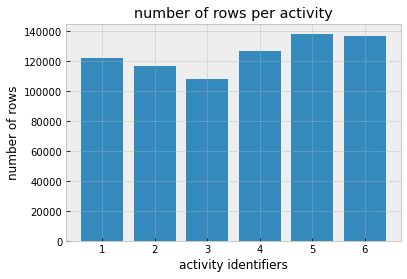

In [52]:
plt.bar(activity_ids,rows_per_activity)
plt.xlabel('activity identifiers')
plt.ylabel('number of rows')
plt.title('number of rows per activity')
plt.show()

In [68]:
def visualize_signal(signal,x_labels,y_labels,title,legend):
    
    plt.figure(figsize=(20,4))
    
    time=[1/float(Fs) *i for i in range(len(signal))]
    
    plt.plot(time,signal,label=legend)
    
    plt.xlabel(x_labels)
    plt.ylabel(y_labels)
    plt.title(title)
    plt.legend(loc="upper left")
    plt.showb()

The median filter is a non-linear digital filtering technique, often used to remove noise from an image or signal. Such noise reduction is a typical pre-processing step to improve the results of later processing (for example, edge detection on an image). Median filtering is very widely used in digital image processing because, under certain conditions, it preserves edges while removing noise (but see the discussion below), also having applications in signal processing.

In [69]:
from scipy.signal import medfilt

def median(signal):
    array=np.array(signal)   
    med_filtered=sp.signal.medfilt(array, kernel_size=3)
    return  med_filtered

In [70]:
Fs = 50 # sampling frequency used in UCI HAPT

from scipy.fftpack import fft # fast fourier transform
from scipy.fftpack import fftfreq # generate frequency components in fft
from scipy.fftpack import ifft # inverse fft
import math

F_nyquist = Fs / 2 # Nyquist frequency

F_cutoff_1 = 0.3 # F_cutoff_1 = 0.3 Hertz for low frequency DC component
F_cutoff_2 = 20  # F_cutoff_2 = 20 Hertz for acc/gyro  components and the high frequency noise components


def components_selection_one_signal(t_signal,F_cutoff_1,F_cutoff_2):
    t_signal = np.array(t_signal)
    t_signal_length = len(t_signal)
    
    f_signal = fft(t_signal)
    
    frequency_components = np.array(sp.fftpack.fftfreq(t_signal_length, d = 1 / float(Fs))) # all frequency components
      
    f_DC_signal = []
    f_body_signal = []
    f_noise_signal = []
    
    for i in range(len(frequency_components)):
        
        f = frequency_components[i]
        
        # selecting the f_signal value associated to freq
        value = f_signal[i]
        
        # filtering DC_component values 
        if abs(f) > 0.3:
            f_DC_signal.append(float(0))                                      
        else:
            f_DC_signal.append(value)
    
        # filtering noise component values 
        if (abs(f) <= 20):
            f_noise_signal.append(float(0))
        else:
            f_noise_signal.append(value)

        # identifying body movement components
        if (abs(f) <= 0.3 or abs(f) > 20):
            f_body_signal.append(float(0))
        else:
            f_body_signal.append(value)
    
    t_DC_component = ifft(np.array(f_DC_signal)).real
    t_body_component = ifft(np.array(f_body_signal)).real
    t_noise =ifft(np.array(f_noise_signal)).real
    
    total_component = t_signal - t_noise
                                     
    return (total_component,t_DC_component,t_body_component,t_noise) 


In [71]:
import math
def mag_3_signals(x,y,z): # Euclidian magnitude
    return [math.sqrt((x[i]**2+y[i]**2+z[i]**2)) for i in range(len(x))]

In [72]:
def verify_gravity(exp_id):
    
    keys = sorted(raw_dict.keys())
    key = keys[exp_id - 1]
    
    acc_x = np.array(raw_dict[key]['acc_X'])
    acc_y = np.array(raw_dict[key]['acc_Y'])
    acc_z = np.array(raw_dict[key]['acc_Z'])

    # apply the filtering method to acc_[X,Y,Z] and store gravity components
    grav_acc_X = components_selection_one_signal(acc_x,F_cutoff_1,F_cutoff_2)[1] 
    grav_acc_Y = components_selection_one_signal(acc_y,F_cutoff_1,F_cutoff_2)[1]
    grav_acc_Z = components_selection_one_signal(acc_z,F_cutoff_1,F_cutoff_2)[1]
    
    # calculating gravity magnitude
    grav_acc_mag = mag_3_signals(grav_acc_X, grav_acc_Y,grav_acc_Z)

    x_labels = 'time in seconds'
    y_labels = 'gravity amplitude in 1g'
    title = 'the euclidian magnitude of gravity 3-axial signals'
    legend = key+' grav_acc_mag'
    
    visualize_signal(grav_acc_mag,x_labels,y_labels,title,legend)
    print('mean value = '+str(np.array(grav_acc_mag).mean())[0:5]+ ' g')

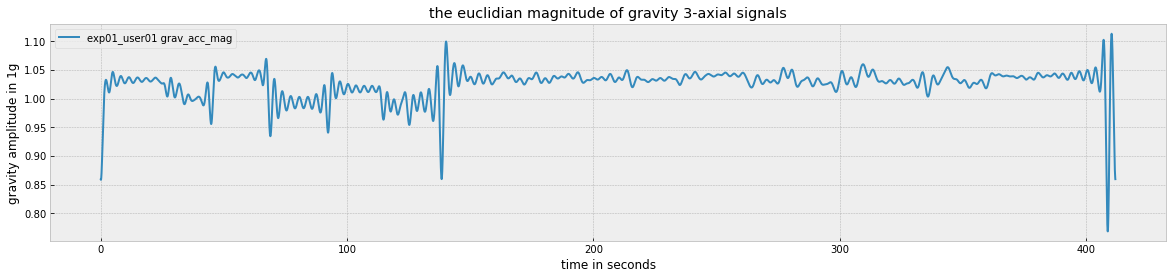

mean value = 1.025 g


In [73]:
verify_gravity(1)

In [74]:
# find jerk signals
dt = 0.02 # delta time between two samples = 1/Fs = 0.02s
def jerk_one_signal(signal):
    return np.array([(signal[i+1]-signal[i])/dt for i in range(len(signal)-1)]) # jerk = delta signal / delta time

# calculate magnitude of signal vector
def mag_3_signals(x,y,z):
    return np.array([math.sqrt((x[i]**2+y[i]**2+z[i]**2)) for i in range(len(x))])

In [84]:
time_domain_signal_dictionary = {}

raw_dict_keys = sorted(raw_dict.keys())

for key in raw_dict_keys:
    
    raw_df = raw_dict[key]
    
    time_sig_df = pd.DataFrame()
    
    for column in raw_df.columns:
        
        t_signal=np.array(raw_df[column])
        
        med_filtred=median(t_signal)
        
        if 'acc' in column:
            
            _,grav_acc,body_acc,_=components_selection_one_signal(med_filtred,F_cutoff_1,F_cutoff_2)
            
            body_acc_jerk=jerk_one_signal(body_acc)
            
            time_sig_df['t_body_'+column]=body_acc[:-1]
            time_sig_df['t_grav_'+column]= grav_acc[:-1]
            time_sig_df['t_body_acc_jerk_'+column[-1]]=body_acc_jerk
        
        elif 'gyro' in column:
            
            _,_,body_gyro,_=components_selection_one_signal(med_filtred,F_cutoff_1,F_cutoff_2)
            
            body_gyro_jerk=jerk_one_signal(body_gyro)
            
            time_sig_df['t_body_gyro_'+column[-1]]=body_gyro[:-1]
            
            time_sig_df['t_body_gyro_jerk_'+column[-1]]=body_gyro_jerk
    
        new_columns_ordered=['t_body_acc_X','t_body_acc_Y','t_body_acc_Z',
                          't_grav_acc_X','t_grav_acc_Y','t_grav_acc_Z',
                          't_body_acc_jerk_X','t_body_acc_jerk_Y','t_body_acc_jerk_Z',
                          't_body_gyro_X','t_body_gyro_Y','t_body_gyro_Z',
                          't_body_gyro_jerk_X','t_body_gyro_jerk_Y','t_body_gyro_jerk_Z']
    
    ordered_time_sig_df=pd.DataFrame()
    
    for col in new_columns_ordered:
        ordered_time_sig_df[col]=time_sig_df[col]
    
    for i in range(0,15,3):
        
        mag_col_name=new_columns_ordered[i][:-1]+'mag'
        
        col0=np.array(ordered_time_sig_df[new_columns_ordered[i]])
        col1=ordered_time_sig_df[new_columns_ordered[i+1]]
        col2=ordered_time_sig_df[new_columns_ordered[i+2]]
        
        mag_signal=mag_3_signals(col0,col1,col2)
        ordered_time_sig_df[mag_col_name]=mag_signal
    
    time_domain_signal_dictionary[key]=ordered_time_sig_df

In [85]:
time_domain_signal_dictionary

{'exp01_user01':        t_body_acc_X  t_body_acc_Y  t_body_acc_Z  t_grav_acc_X  t_grav_acc_Y  \
 0          0.382899     -0.206562     -0.169117      0.431759      0.175976   
 1          0.550980     -0.317339     -0.239649      0.443087      0.169277   
 2          0.368165     -0.207616     -0.165561      0.454376      0.162556   
 3          0.447537     -0.265659     -0.207626      0.465623      0.155815   
 4          0.400502     -0.242250     -0.179288      0.476821      0.149057   
 ...             ...           ...           ...           ...           ...   
 20592     -0.416269      0.310947     -0.021898      0.363258      0.215537   
 20593     -0.428149      0.316776      0.050531      0.374713      0.209033   
 20594     -0.481686      0.338849      0.190686      0.386160      0.202490   
 20595     -0.397257      0.284736      0.194901      0.397593      0.195910   
 20596     -0.544446      0.388906      0.258118      0.409007      0.189295   
 
        t_grav_acc_Z  

In [86]:
display(time_domain_signal_dictionary['exp01_user01'].shape)
display(time_domain_signal_dictionary['exp01_user01'].describe())
time_domain_signal_dictionary['exp01_user01'].head(10)

(20597, 20)

,t_body_acc_X,t_body_acc_Y,t_body_acc_Z,t_grav_acc_X,t_grav_acc_Y,t_grav_acc_Z,t_body_acc_jerk_X,t_body_acc_jerk_Y,t_body_acc_jerk_Z,t_body_gyro_X,t_body_gyro_Y,t_body_gyro_Z,t_body_gyro_jerk_X,t_body_gyro_jerk_Y,t_body_gyro_jerk_Z,t_body_acc_mag,t_grav_acc_mag,t_body_acc_jerk_mag,t_body_gyro_mag,t_body_gyro_jerk_mag
count,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,2.059700e+04,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000,20597.000000
mean,0.000018,-0.000014,-0.000009,0.880358,-0.101501,0.097309,-0.001833,0.001183,0.000849,3.259619e-07,0.000008,0.000010,0.000046,0.000095,0.000362,0.165296,1.025479,3.404274,0.489705,9.439402
std,0.167505,0.123847,0.106477,0.299187,0.314444,0.262835,4.076298,3.237138,2.298076,3.907032e-01,0.497555,0.265791,7.641439,13.033311,5.724163,0.165557,0.025535,4.559251,0.480657,13.111758
min,-0.698870,-0.993486,-0.671478,-0.231975,-0.367943,-0.161622,-38.735217,-33.718078,-24.262993,-3.141414e+00,-2.694787,-4.050512,-90.662943,-158.457438,-89.662267,0.000864,0.768925,0.006144,0.001641,0.017986
25%,-0.044563,-0.024197,-0.042269,0.968003,-0.275034,-0.050273,-0.481136,-0.422376,-0.347403,-1.189116e-01,-0.139441,-0.059319,-1.100310,-1.705868,-0.832493,0.025437,1.021875,0.272200,0.087023,0.506674
50%,-0.001207,0.002857,-0.003154,0.997735,-0.236751,-0.025435,0.003867,0.003613,0.003452,3.737832e-03,-0.002389,0.003384,0.003147,-0.005965,-0.002999,0.114319,1.031724,1.581932,0.348679,4.510858
75%,0.020914,0.051177,0.026000,1.007358,-0.123642,0.090625,0.568717,0.505230,0.381417,1.546320e-01,0.101817,0.088021,1.159630,1.392834,0.799237,0.262351,1.038524,4.837894,0.758609,13.308692
max,1.031485,0.473201,0.493350,1.066684,0.832075,1.015052,34.647970,34.482683,35.302951,2.698454e+00,4.530312,2.260099,95.696959,151.910819,60.809206,1.180706,1.115731,54.209353,6.249451,160.671661


,t_body_acc_X,t_body_acc_Y,t_body_acc_Z,t_grav_acc_X,t_grav_acc_Y,t_grav_acc_Z,t_body_acc_jerk_X,t_body_acc_jerk_Y,t_body_acc_jerk_Z,t_body_gyro_X,t_body_gyro_Y,t_body_gyro_Z,t_body_gyro_jerk_X,t_body_gyro_jerk_Y,t_body_gyro_jerk_Z,t_body_acc_mag,t_grav_acc_mag,t_body_acc_jerk_mag,t_body_gyro_mag,t_body_gyro_jerk_mag
0,0.382899,-0.206562,-0.169117,0.431759,0.175976,0.720859,8.404087,-5.538872,-3.526643,-0.025624,-0.210093,-0.361419,0.552413,3.197618,-0.792801,0.466776,0.858500,10.665130,0.418831,3.340427
1,0.550980,-0.317339,-0.239649,0.443087,0.169277,0.715098,-9.140781,5.486163,3.704421,-0.014575,-0.146141,-0.377275,-0.185277,11.295307,2.384643,0.679496,0.858106,11.286035,0.404853,11.545770
2,0.368165,-0.207616,-0.165561,0.454376,0.162556,0.709293,3.968636,-2.902182,-2.103241,-0.018281,0.079766,-0.329582,-2.485754,6.100713,-0.485211,0.453938,0.857892,5.347556,0.339590,6.605536
3,0.447537,-0.265659,-0.207626,0.465623,0.155815,0.703445,-2.351782,1.170481,1.416879,-0.067996,0.201780,-0.339286,-0.443564,4.770525,-0.809487,0.560333,0.857856,2.984702,0.400567,4.859005
4,0.400502,-0.242250,-0.179288,0.476821,0.149057,0.697552,-1.216711,0.246154,0.088675,-0.076867,0.297190,-0.355476,-0.318617,1.140798,-2.141851,0.501229,0.857995,1.244525,0.469674,2.447542
5,0.376168,-0.237327,-0.177515,0.487967,0.142285,0.691615,0.596114,-0.795676,-0.437485,-0.083240,0.320006,-0.398313,-1.163408,-0.469868,-0.531287,0.478892,0.858305,1.086207,0.517674,1.362556
6,0.388090,-0.253240,-0.186264,0.499057,0.135502,0.685632,-3.054501,1.738420,1.389006,-0.106508,0.310609,-0.408939,-2.432403,-3.302559,0.688612,0.499438,0.858784,3.779076,0.524455,4.159046
7,0.327000,-0.218472,-0.158484,0.510084,0.128712,0.679604,1.088968,-0.883450,0.230896,-0.155156,0.244558,-0.395167,0.293870,-7.173853,0.563689,0.424000,0.859427,1.421143,0.489937,7.201963
8,0.348779,-0.236141,-0.153866,0.521047,0.121916,0.673530,-1.513952,0.779286,2.073165,-0.149278,0.101081,-0.383893,2.338940,-1.061617,0.984403,0.448424,0.860230,2.682788,0.424117,2.750767
9,0.318500,-0.220555,-0.112403,0.531939,0.115118,0.667409,-0.718511,0.411919,0.397516,-0.102500,0.079848,-0.364205,2.943771,-1.658215,-0.394640,0.403387,0.861189,0.918670,0.386687,3.401647


In [90]:
def normalize5(number): 
    stre=str(number)
    if len(stre)<5:
        l=len(stre)
        for i in range(0,5-l):
            stre="0"+stre
    return stre 

def normalize2(number):
    stre=str(number)
    if len(stre)<2:
        stre="0"+stre
    return stre

In [91]:

def Windowing_type_1(time_sig_dic,Labels_Data_Frame):   
    
    columns=time_sig_dic['exp01_user01'].columns
    window_ID=0
    t_dic_win_type_I={}
    
    BA_array=np.array(Labels_Data_Frame[(Labels_Data_Frame["activity_number_ID"] <7)])
    
    for line in BA_array:
        file_key= 'exp' + normalize2(int(line[0]))  +  '_user' + normalize2(int(line[1]))

        act_ID=line[2]

        start_point=line[3]

        for cursor in range(start_point,line[4]-127,64):

            end_point=cursor+128

            data=np.array(time_sig_dic[file_key].iloc[cursor:end_point])

            window=pd.DataFrame(data=data,columns=columns)

            key='t_W'+normalize5(window_ID)+'_'+file_key+'_act'+normalize2(act_ID)
            t_dic_win_type_I[key]=window

            window_ID=window_ID+1
        
    return t_dic_win_type_I

In [92]:
t_dic_win_type_I  = Windowing_type_1(time_domain_signal_dictionary,Labels_Data_Frame)

In [93]:
from scipy import fftpack
from numpy.fft import *

def fast_fourier_transform_one_signal(t_signal):
    complex_f_signal= fftpack.fft(t_signal)
    amplitude_f_signal=np.abs(complex_f_signal)
    return amplitude_f_signal

def fast_fourier_transform(t_window):
    
    f_window=pd.DataFrame()
    
    for column in t_window.columns:
        
        if 'grav' not in column:
            
            t_signal=np.array(t_window[column])
           
            f_signal= np.apply_along_axis(fast_fourier_transform_one_signal,0,t_signal)
            f_window["f_"+column[2:]]=f_signal
    
    return f_window


In [94]:
f_dic_win_type_I = {'f'+key[1:] : t_w1_df.pipe(fast_fourier_transform) for key, t_w1_df in t_dic_win_type_I.items()}


In [95]:
f_window = f_dic_win_type_I[sorted(f_dic_win_type_I.keys())[0]]
f_window.head()

,f_body_acc_X,f_body_acc_Y,f_body_acc_Z,f_body_acc_jerk_X,f_body_acc_jerk_Y,f_body_acc_jerk_Z,f_body_gyro_X,f_body_gyro_Y,f_body_gyro_Z,f_body_gyro_jerk_X,f_body_gyro_jerk_Y,f_body_gyro_jerk_Z,f_body_acc_mag,f_body_acc_jerk_mag,f_body_gyro_mag,f_body_gyro_jerk_mag
0,0.257558,0.055128,0.568459,0.004474,1.018802,2.057622,1.302252,2.880254,0.066856,0.574643,8.573938,3.442790,3.790846,25.481237,14.048363,73.764900
1,0.324072,1.169116,2.325911,0.794786,1.852232,4.739415,2.270811,8.786654,3.040972,5.543606,13.054902,4.222888,0.110791,1.628419,2.657498,6.699360
2,0.045438,0.300832,0.599853,0.220647,0.463545,1.179457,0.332364,2.154464,0.845314,1.462829,2.404663,0.720631,0.721155,0.921396,1.619180,3.680039
3,0.026573,0.162318,0.341578,0.195753,0.523164,0.458591,0.396876,1.331866,0.486980,2.359180,1.583174,0.965404,0.326605,1.490716,0.289519,2.877012
4,0.040355,0.192653,0.218084,0.391329,0.872601,1.024741,0.484334,0.835291,0.432675,4.736053,0.525072,1.014540,0.252132,0.395907,0.434509,0.690402


In [96]:
def mean_axial(df):
    array=np.array(df)
    mean_vector = list(array.mean(axis=0))
    return mean_vector

def std_axial(df):
    array=np.array(df)
    std_vector = list(array.std(axis=0))
    return std_vector

from statsmodels.robust import mad as median_deviation

def mad_axial(df):
    array=np.array(df)
    mad_vector = list(median_deviation(array,axis=0))
    return mad_vector

def max_axial(df):
    array=np.array(df)
    max_vector=list(array.max(axis=0))
    return max_vector

def min_axial(df):
    array=np.array(df)
    min_vector=list(array.min(axis=0))
    return min_vector

from scipy.stats import iqr as IQR
def IQR_axial(df):
    array=np.array(df)
    IQR_vector=list(np.apply_along_axis(IQR,0,array))
    return IQR_vector

from scipy.stats import entropy
def entropy_axial(df):
    array=np.array(df)
    entropy_vector=list(np.apply_along_axis(entropy,0,abs(array)))
    return entropy_vector

In [97]:
def mean_mag(mag_column):
    array=np.array(mag_column)
    mean_value = float(array.mean())
    return mean_value

def std_mag(mag_column):
    array=np.array(mag_column)
    std_value = float(array.std())
    return std_value

def mad_mag(mag_column):
    array=np.array(mag_column)
    mad_value = float(median_deviation(array))
    return mad_value

def max_mag(mag_column):
    array=np.array(mag_column)
    max_value=float(array.max())
    return max_value

def min_mag(mag_column):
    array=np.array(mag_column)
    min_value= float(array.min())
    return min_value

def IQR_mag(mag_column):
    array=np.array(mag_column)
    IQR_value=float(IQR(array))
    return IQR_value

def entropy_mag(mag_column):
    array=np.array(mag_column)
    entropy_value=float(entropy(array))
    return entropy_value

In [99]:
def t_axial_features_generation(t_window):
    
    axial_columns=t_window.columns[0:15]
    
    axial_df=t_window[axial_columns]
    
    t_axial_features=[]
    for col in range(0,15,3):
        df=axial_df[axial_columns[col:col+3]] # select each group of 3-axial signal: signal_name[X,Y,Z]
        
        mean_vector   = mean_axial(df)
        std_vector    = std_axial(df)
        mad_vector    = mad_axial(df)
        max_vector    = max_axial(df)
        min_vector    = min_axial(df)
        sma_value     = t_sma_axial(df)
        energy_vector = t_energy_axial(df)
        IQR_vector    = IQR_axial(df)
        entropy_vector= entropy_axial(df)
        AR_vector     = t_arburg_axial(df)
        corr_vector   = t_corr_axial(df)
        
        t_3axial_vector= mean_vector + std_vector + mad_vector + max_vector + min_vector + [sma_value] + energy_vector + IQR_vector + entropy_vector + AR_vector + corr_vector
        
        t_axial_features= t_axial_features+ t_3axial_vector
    
    return t_axial_features

In [100]:
def t_sma_mag(mag_column):
    array=np.array(mag_column)
    sma_mag=float(abs(array).sum())
    return sma_mag

def t_energy_mag(mag_column):
    array=np.array(mag_column)
    energy_value=float((array**2).sum())
    return energy_value

def t_arburg_mag(mag_column):
    
    array = np.array(mag_column)
    
    AR_vector= list(_arburg2(array,4)[0][1:].real)
    
    return AR_vector

In [101]:
def t_mag_features_generation(t_window):
        
    mag_columns=t_window.columns[15:]
    mag_columns=t_window[mag_columns]
    
    t_mag_features=[]
    
    for col in mag_columns:
        
        mean_value   = mean_mag(mag_columns[col])
        std_value    = std_mag(mag_columns[col])
        mad_value    = mad_mag(mag_columns[col])
        max_value    = max_mag(mag_columns[col])
        min_value    = min_mag(mag_columns[col])
        sma_value    = t_sma_mag(mag_columns[col])
        energy_value = t_energy_mag(mag_columns[col])
        IQR_value    = IQR_mag(mag_columns[col])
        entropy_value= entropy_mag(mag_columns[col])
        AR_vector    = t_arburg_mag(mag_columns[col])
        
        col_mag_values = [mean_value, std_value, mad_value, max_value, min_value, sma_value, 
                          energy_value,IQR_value, entropy_value]+ AR_vector
        
        t_mag_features= t_mag_features+ col_mag_values
    
    return t_mag_features
    

In [102]:
def time_features_names():
    
    t_axis_signals=[['t_body_acc_X','t_body_acc_Y','t_body_acc_Z'],
                    ['t_grav_acc_X','t_grav_acc_Y','t_grav_acc_Z'],
                    ['t_body_acc_jerk_X','t_body_acc_jerk_Y','t_body_acc_jerk_Z'],    

                    ['t_body_gyro_X','t_body_gyro_Y','t_body_gyro_Z'],
            ['t_body_gyro_Jerk_X','t_body_gyro_Jerk_Y','t_body_gyro_Jerk_Z'],]
    
    magnitude_signals=['t_body_acc_Mag','t_grav_acc_Mag','t_body_acc_jerk_Mag','t_body_gyro_Mag','t_body_gyro_Jerk_Mag']

    t_one_input_features_name1=['_mean()','_std()','_mad()','_max()','_min()']

    t_one_input_features_name2=['_energy()','_iqr()','_entropy()']

    t_one_input_features_name3=['_AR1()','_AR2()','_AR3()','_AR4()']

    correlation_columns=['_Corr(X,Y)','_Corr(X,Z)','_Corr(Y,Z)']


    features=[]
    
    for columns in t_axis_signals:
        
        for feature in t_one_input_features_name1:
            
            for column in columns:
                
                newcolumn=column[:-2]+feature+column[-2:]
                features.append(newcolumn)
        
        sma_column=column[:-2]+'_sma()'
        features.append(sma_column)
        
        for feature in t_one_input_features_name2:
            for column in columns:
                newcolumn=column[:-2]+feature+column[-2:]
                features.append(newcolumn)
        
        for column in columns:
            for feature in t_one_input_features_name3:
                newcolumn=column[0:-2]+feature+column[-2:]
                features.append(newcolumn)
        
        for feature in correlation_columns:
            newcolumn=column[0:-2]+feature
            features.append(newcolumn)

    for columns in magnitude_signals:

        for feature in t_one_input_features_name1:
            newcolumn=columns+feature
            features.append(newcolumn)
        
        sma_column=columns+'_sma()'
        features.append(sma_column)
        
        for feature in t_one_input_features_name2: 
            newcolumn=columns+feature
            features.append(newcolumn)
        
        for feature in t_one_input_features_name3:
            newcolumn=columns+feature
            features.append(newcolumn)
    
    time_list_features=features
    
    return time_list_features

In [103]:

def f_sma_axial(df):
    
    array=np.array(df)
    sma_value=float((abs(array)/math.sqrt(128)).sum())/float(3)
    
    return sma_value

def f_energy_axial(df):
    
    array=np.array(df)
    
    energy_vector=list((array**2).sum(axis=0)/float(len(array)))
    
    return energy_vector

freqs=sp.fftpack.fftfreq(128, d=0.02) 
                                
def f_max_Inds_axial(df):
    array=np.array(df)
    max_Inds_X =freqs[array[1:65,0].argmax()+1]
    max_Inds_Y =freqs[array[1:65,1].argmax()+1]
    max_Inds_Z =freqs[array[1:65,2].argmax()+1]
    max_Inds_vector= [max_Inds_X,max_Inds_Y,max_Inds_Z]
    return max_Inds_vector

def f_mean_Freq_axial(df):
    array=np.array(df)
    
    mean_freq_X = np.dot(freqs,array[:,0]).sum() / float(array[:,0].sum())
    mean_freq_Y = np.dot(freqs,array[:,1]).sum() / float(array[:,1].sum())
    mean_freq_Z = np.dot(freqs,array[:,2]).sum() / float(array[:,2].sum())
    
    mean_freq_vector=[mean_freq_X,mean_freq_Y,mean_freq_Z]
    
    return  mean_freq_vector

from scipy.stats import kurtosis
from scipy.stats import skew
    
def f_skewness_and_kurtosis_axial(df):
    array=np.array(df)
    
    skew_X= skew(array[:,0])
    kur_X= kurtosis(array[:,0])
    
    skew_Y= skew(array[:,1])
    kur_Y= kurtosis(array[:,1])
    
    skew_Z= skew(array[:,2])
    kur_Z= kurtosis(array[:,2])
    
    skew_kur_3axial_vector=[skew_X,kur_X,skew_Y,kur_Y,skew_Z,kur_Z]
    
    return skew_kur_3axial_vector

B1=[(1,9),(9,17),(17,25),(25,33),(33,41),(41,49),(49,57),(57,65)] 
B2=[(1,17),(17,31),(31,49),(49,65)]
B3=[(1,25),(25,49)]

def f_one_band_energy(f_signal,band):
    f_signal_bounded = f_signal[band[0]:band[1]]
    energy_value=float((f_signal_bounded**2).sum()/float(len(f_signal_bounded)))
    return energy_value

def f_all_bands_energy_axial(df):
    
    E_3_axis =[]
    
    array=np.array(df)
    for i in range(0,3):
        E1=[ f_one_band_energy( array,( B1 [j][0], B1 [j][1]) ) for j in range(len(B1))]
        E2=[ f_one_band_energy( array,( B2 [j][0], B2 [j][1]) ) for j in range(len(B2))]
        E3=[ f_one_band_energy( array,( B3 [j][0], B3 [j][1]) ) for j in range(len(B3))]
    
        E_one_axis = E1+E2+E3
        
        E_3_axis= E_3_axis + E_one_axis
    
    return E_3_axis

In [104]:
def f_axial_features_generation(f_window):
    
    axial_columns=f_window.columns[0:12]
    axial_df=f_window[axial_columns]
    f_all_axial_features=[]
    
    
    
    for col in range(0,12,3):
        
        df=axial_df[axial_columns[col:col+3]]
      
        mean_vector                  = mean_axial(df)
        std_vector                   = std_axial(df)
        mad_vector                   = mad_axial(df)
        max_vector                   = max_axial(df)
        min_vector                   = min_axial(df)
        sma_value                    = f_sma_axial(df)
        energy_vector                = f_energy_axial(df)
        IQR_vector                   = IQR_axial(df)
        entropy_vector               = entropy_axial(df)
        max_inds_vector              = f_max_Inds_axial(df)
        mean_Freq_vector             = f_mean_Freq_axial(df)
        skewness_and_kurtosis_vector = f_skewness_and_kurtosis_axial(df)
        bands_energy_vector          = f_all_bands_energy_axial(df)

        f_3axial_features = mean_vector +std_vector + mad_vector + max_vector + min_vector + [sma_value] + energy_vector + IQR_vector + entropy_vector + max_inds_vector + mean_Freq_vector + skewness_and_kurtosis_vector + bands_energy_vector

        f_all_axial_features = f_all_axial_features+ f_3axial_features
        
    return f_all_axial_features

In [105]:
def f_sma_mag(mag_column):
    
    array=np.array(mag_column)
    sma_value=float((abs(array)/math.sqrt(len(mag_column))).sum())
    
    return sma_value

def f_energy_mag(mag_column):
    
    array=np.array(mag_column)
    energy_value=float((array**2).sum()/float(len(array)))
    return energy_value

def f_max_Inds_mag(mag_column):
    
    array=np.array(mag_column)
    
    max_Inds_value =float(freqs[array[1:65].argmax()+1])
    
    return max_Inds_value

def f_mean_Freq_mag(mag_column):
    
    array=np.array(mag_column)
    
    mean_freq_value = float(np.dot(freqs,array).sum() / float(array.sum()))
    
    return  mean_freq_value



from scipy.stats import skew
def f_skewness_mag(mag_column):
    
    array=np.array(mag_column)
    skew_value     = float(skew(array))
    return skew_value



from scipy.stats import kurtosis
def f_kurtosis_mag(mag_column):
    array=np.array(mag_column)
    kurtosis_value = float(kurtosis(array))

    return kurtosis_value


In [106]:
def f_mag_features_generation(f_window):
    
    mag_columns=f_window.columns[-4:]
    mag_columns=f_window[mag_columns]
    
    f_mag_features=[]
    for col in mag_columns:
        
        mean_value   = mean_mag(mag_columns[col])
        std_value    = std_mag(mag_columns[col])
        mad_value    = mad_mag(mag_columns[col])
        max_value    = max_mag(mag_columns[col])
        min_value    = min_mag(mag_columns[col])
        sma_value    = f_sma_mag(mag_columns[col])
        energy_value = f_energy_mag(mag_columns[col])
        IQR_value    = IQR_mag(mag_columns[col])
        entropy_value= entropy_mag(mag_columns[col])
        max_Inds_value=f_max_Inds_mag(mag_columns[col])
        mean_Freq_value= f_mean_Freq_mag (mag_columns[col])
        skewness_value=  f_skewness_mag(mag_columns[col])
        kurtosis_value = f_kurtosis_mag(mag_columns[col])
        # 13 value per each t_mag_column
        col_mag_values = [mean_value, std_value, mad_value, max_value, 
                          min_value, sma_value, energy_value,IQR_value, 
                          entropy_value, max_Inds_value, mean_Freq_value,
                          skewness_value, kurtosis_value ]
        
        
        f_mag_features= f_mag_features+ col_mag_values
    
    return f_mag_features
    

In [107]:
def frequency_features_names():

    axial_signals=[
                    ['f_body_acc_X','f_body_acc_Y','f_body_acc_Z'],
                    ['f_body_acc_Jerk_X','f_body_acc_Jerk_Y','f_body_acc_Jerk_Z'],
                    ['f_body_gyro_X','f_body_gyro_Y','f_body_gyro_Z'],
                    ['f_body_gyro_Jerk_X','f_body_gyro_Jerk_Y','f_body_gyro_Jerk_Z'],
                  ]

    mag_signals=['f_body_acc_Mag','f_body_acc_Jerk_Mag','f_body_gyro_Mag','f_body_gyro_Jerk_Mag']

    f_one_input_features_name1=['_mean()','_std()','_mad()','_max()','_min()']

    f_one_input_features_name2=['_energy()','_iqr()','_entropy()','_maxInd()','_meanFreq()']

    f_one_input_features_name3= ['_skewness()','_kurtosis()']

    f_one_input_features_name4=[
                                '_BE[1-8]','_BE[9-16]','_BE[17-24]','_BE[25-32]',
                                '_BE[33-40]','_BE[41-48]','_BE[49-56]','_BE[57-64]',
                                '_BE[1-16]','_BE[17-32]','_BE[33-48]','_BE[49-64]',
                                '_BE[1-24]','_BE[25-48]'
                               ]
    
    frequency_features_names=[]
    
    for columns in axial_signals:
        
        for feature in f_one_input_features_name1: 
            for column in columns:
                newcolumn=column[:-2]+feature+column[-2:]
                frequency_features_names.append(newcolumn)
        
        sma_column=column[:-2]+'_sma()'
        frequency_features_names.append(sma_column)

        for feature in f_one_input_features_name2:
            for column in columns:
                newcolumn=column[:-2]+feature+column[-2:]
                frequency_features_names.append(newcolumn)
        
        for column in columns:
            for feature in f_one_input_features_name3:
                newcolumn=column[:-2]+feature+column[-2:]
                frequency_features_names.append(newcolumn)
        
        for column in columns:
            for feature in f_one_input_features_name4:
                newcolumn=column[:-2]+feature+column[-2:]
                frequency_features_names.append(newcolumn)
   
    for column in mag_signals:
        for feature in f_one_input_features_name1:
            frequency_features_names.append(column+feature)

        sma_column=column+'_sma()'
        frequency_features_names.append(sma_column)

        for feature in f_one_input_features_name2:
            frequency_features_names.append(column+feature)
        
        for feature in f_one_input_features_name3:
            frequency_features_names.append(column+feature)
    
    return frequency_features_names

In [108]:
from math import acos
from math import sqrt

def magnitude_vector(vector3D):
    return sqrt((vector3D**2).sum())

def angle(vector1, vector2):
    vector1_mag=magnitude_vector(vector1)
    vector2_mag=magnitude_vector(vector2)
   
    scalar_product=np.dot(vector1,vector2)
    cos_angle=scalar_product/float(vector1_mag*vector2_mag)
    
    if cos_angle>1:
        cos_angle=1
    elif cos_angle<-1:
        cos_angle=-1
    
    angle_value=float(acos(cos_angle))
    return angle_value

def angle_features(t_window): 
    angles_list=[]
    
    V2_columns=['t_grav_acc_X','t_grav_acc_Y','t_grav_acc_Z']
    V2_Vector=np.array(t_window[V2_columns].mean()) # mean values
    
    V1_columns=['t_body_acc_X','t_body_acc_Y','t_body_acc_Z']
    V1_Vector=np.array(t_window[V1_columns].mean())
    angles_list.append(angle(V1_Vector, V2_Vector))
    
    V1_columns=['t_body_acc_jerk_X','t_body_acc_jerk_Y','t_body_acc_jerk_Z']
    V1_Vector=np.array(t_window[V1_columns].mean())
    angles_list.append(angle(V1_Vector, V2_Vector))
    
    V1_columns=['t_body_gyro_X','t_body_gyro_Y','t_body_gyro_Z']
    V1_Vector=np.array(t_window[V1_columns].mean())
    angles_list.append(angle(V1_Vector, V2_Vector))
    
    V1_columns=['t_body_gyro_jerk_X','t_body_gyro_jerk_Y','t_body_gyro_jerk_Z']
    V1_Vector=np.array(t_window[V1_columns].mean())
    angles_list.append(angle(V1_Vector, V2_Vector))

    V1_Vector=np.array([1,0,0])
    angles_list.append(angle(V1_Vector, V2_Vector))

    V1_Vector=np.array([0,1,0])
    angles_list.append(angle(V1_Vector, V2_Vector))
    

    V1_Vector=np.array([0,0,1])
    angles_list.append(angle(V1_Vector, V2_Vector))
    
    return angles_list


In [109]:
angle_columns=['angle0()','angle1()','angle2()','angle3()','angle4()','angle5()','angle6()']

In [110]:
all_columns=time_features_names()+frequency_features_names()+angle_columns+['activity_Id','user_Id']

def Dataset_Generation_PipeLine(t_dic,f_dic):

    
    final_Dataset=pd.DataFrame(data=[],columns= all_columns)
    
    for i in range(len(t_dic)):

        t_key=sorted(t_dic.keys() )[i]
        f_key=sorted(f_dic.keys() )[i]
        
        t_window=t_dic[t_key]
        f_window=f_dic[f_key]

        window_user_id= int(t_key[-8:-6])
        window_activity_id=int(t_key[-2:])

        time_features = t_axial_features_generation(t_window) + t_mag_features_generation(t_window)
        
        frequency_features = f_axial_features_generation(f_window) + f_mag_features_generation(f_window)
        
        additional_features= angle_features(t_window)
        
        row= time_features + frequency_features + additional_features + [int(window_activity_id),int(window_user_id)]
        
        free_index=len(final_Dataset)
        

        final_Dataset.loc[free_index]= row
        
    return final_Dataset

In [111]:
Dataset_type_I= Dataset_Generation_PipeLine(t_dic_win_type_I,f_dic_win_type_I)

print('The shape of Dataset type I is :',Dataset_type_I.shape)
display(Dataset_type_I.describe())
display(Dataset_type_I.head(3))

The shape of Dataset type I is : (10399, 642)


,t_body_acc_mean()_X,t_body_acc_mean()_Y,t_body_acc_mean()_Z,t_body_acc_std()_X,t_body_acc_std()_Y,t_body_acc_std()_Z,t_body_acc_mad()_X,t_body_acc_mad()_Y,t_body_acc_mad()_Z,t_body_acc_max()_X,...,f_body_gyro_Jerk_Mag_kurtosis(),angle0(),angle1(),angle2(),angle3(),angle4(),angle5(),angle6(),activity_Id,user_Id
count,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,...,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000
mean,0.000181,-0.000253,0.000043,0.128598,0.085825,0.071912,0.120879,0.077916,0.065929,0.316530,...,87.316776,1.563568,1.568236,1.576921,1.562869,0.499084,1.524820,1.472504,3.638523,16.174825
std,0.009100,0.006948,0.006990,0.139670,0.081466,0.068746,0.132093,0.073289,0.060767,0.345820,...,18.276604,0.708931,0.739220,0.832229,0.720143,0.503324,0.436066,0.369194,1.740531,8.668025
min,-0.047488,-0.038424,-0.047545,0.001815,0.002281,0.003507,0.001536,0.002089,0.002521,0.003151,...,4.001917,0.014389,0.012423,0.008734,0.000735,0.002503,0.005365,0.186404,1.000000,1.000000
25%,-0.003148,-0.003659,-0.003376,0.009211,0.012132,0.011688,0.009886,0.012923,0.012555,0.018161,...,79.031634,1.029598,1.012353,0.886842,1.002199,0.182162,1.436908,1.368353,2.000000,9.000000
50%,0.000080,-0.000127,-0.000052,0.023508,0.031908,0.029514,0.024822,0.032945,0.031158,0.053550,...,91.460463,1.565840,1.573529,1.585684,1.558683,0.283949,1.692562,1.541213,4.000000,17.000000
75%,0.003343,0.003268,0.003301,0.242569,0.159502,0.128384,0.229137,0.141543,0.116171,0.615332,...,100.464053,2.090354,2.125023,2.261115,2.110415,0.477155,1.791726,1.687608,5.000000,24.000000
max,0.046679,0.036071,0.045893,0.635720,0.341042,0.353751,0.655178,0.339054,0.364321,1.226526,...,115.793220,3.124480,3.136241,3.132832,3.117101,1.970707,2.864651,2.930397,6.000000,30.000000


,t_body_acc_mean()_X,t_body_acc_mean()_Y,t_body_acc_mean()_Z,t_body_acc_std()_X,t_body_acc_std()_Y,t_body_acc_std()_Z,t_body_acc_mad()_X,t_body_acc_mad()_Y,t_body_acc_mad()_Z,t_body_acc_max()_X,...,f_body_gyro_Jerk_Mag_kurtosis(),angle0(),angle1(),angle2(),angle3(),angle4(),angle5(),angle6(),activity_Id,user_Id
0,0.002012,0.000431,0.004441,0.004025,0.013983,0.027372,0.004725,0.019132,0.025280,0.010209,...,104.954731,1.070749,1.431913,2.116867,1.431211,0.152888,1.692169,1.478284,5.0,1.0
1,-0.000713,-0.003098,0.000823,0.004491,0.012449,0.022660,0.004168,0.014039,0.022765,0.009030,...,109.749747,1.652580,1.856253,1.210803,1.753009,0.149532,1.687352,1.477548,5.0,1.0
2,-0.000301,0.004025,-0.004280,0.004866,0.009352,0.016821,0.005255,0.010157,0.020681,0.011261,...,110.445137,1.776612,1.159471,1.763958,2.682216,0.157004,1.696158,1.476770,5.0,1.0


In [129]:
Dataset_type_I_part1=Dataset_type_I.iloc[0:5001]

Dataset_type_I_part1.to_csv('Week 7 - Processed-Data/Processed_Signal.csv', na_rep = 'NaN',  
             columns=None, header=True, 
             index=False, mode='w', 
             encoding='utf-8',  
             line_terminator='\n', 
             )
